<div style="text-align: center;">
  <h1>Приложение отвечает на вопросы по контексту введённого текста.</h1>
</div>

<div style="position: absolute; bottom: 0; right: 0;">
  <p>Задание по дисциплине программная инженерия магистратуры "Инженерия машинного обучения".<br>
  Выполнила студентка Антропова Н.Г.</p>
</div>


#Первоначальная установка и импорт зависимостей:

In [ ]:
!nvidia-smi

Sat Jan 28 11:10:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.3 MB/s eta 0:00:00


In [ ]:
!pip install protobuf~=3.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Создание веб-приложения

>В основе приложения [математичская модель, отвечающая на вопрос по контексту](https://huggingface.co/AndrewChar/model-QA-5-epoch-RU)

Установка и импорт зависимостей:

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "AndrewChar/model-QA-5-epoch-RU"

# Получение предсказаний
# pipeline вопрос-ответ
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name) # nlp - переменная для хранения созданного конвейера
QA_input = {
    'question': 'Что такое API?',
    'context': 'API — описание способов взаимодействия одной компьютерной программы с другими.'
}
res = nlp(QA_input) # res - переменная для хранения результата ответа

# Загрузка модели и токенайзера
model = AutoModelForQuestionAnswering.from_pretrained(model_name, from_tf=True)


All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at AndrewChar/model-QA-5-epoch-RU.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.


All TF 2.0 model weights were used when initializing DistilBertForQuestionAnswering.

All the weights of DistilBertForQuestionAnswering were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForQuestionAnswering for predictions without further training.


> **Тест 1.0**


In [ ]:
#Текст для анализа его контекста
wikiText = """
API — описание способов взаимодействия одной компьютерной программы с другими.
"""

In [ ]:
#Определение ввода вопроса
questionSet = {
                'question': 'Что такое API?',
                'context': wikiText
                
                }

In [ ]:
#Вызов модели
res = nlp(questionSet)

Результат работы теста 1.0:



In [ ]:
res.get('answer')

'описание способов взаимодействия одной компьютерной программы'

> **Тест 1.1**



In [ ]:
#Текст для анализа его контекста
wikiText = """
АРХИТЕКТУРА ПАЙПЛАЙН
Архитектура пайплайн (от английского pipeline - трубопровод) берет свое начало из операционной системы Unix. Linux является одним из современных вариантов Unix и использует те же принципы. При проектировании Unix было принято решение разрабатывать простые программы, каждая из которых решает только одну задачи, но делает это эффективно. Чтобы программы можно было использовать для решения сложных задач, был создан механизм комбинации программ с друг с другом, который в Unix назвали pipe (труба).
С помощью pipe выходные данные от одной программы передаются на вход другой. Таким образом можно комбинировать несколько программ, чтобы реализовывать сложные задачи обработки данных.
В архитектуре пайплайн используются компоненты двух типов: фильтры (производят обработку данных), и pipe или трубы (передают данные). Передача данных, как правило, выполняется однонаправленно: от одного фильтра к другому.
Архитектура пайплайн часто используется в приложениях анализа данных и машинного обучения. Например, первый фильтр может готовить данные для анализа, второй запускает модель машинного обучения для анализа данных, а третий — преобразует выходные данные из модели машинного обучения к понятному пользователю виду. Библиотека Hugging Face, которую мы рассматривали ранее, применяет именно этот архитектурный шаблон.
Другое популярное название архитектуры пайплайна: "конвейерная архитектура". В пайплайне производится несколько последовательных операций по обработке данных. Это напоминает производство промышленной продукции на конвейере, где операции также выполняются последовательно одна за другой.
"""

In [ ]:
#Определение ввода вопроса
questionSet = {
                'question': 'Как выполняется передача данных в архитектуре Пайплайн?',
                'context': wikiText
                
                }

In [ ]:
#Вызов модели
res = nlp(questionSet)

Результат работы теста 1.1:

In [ ]:
res.get('answer')

'от одного фильтра к другому'

#Исполнение кода с помощью библиотеки Anvil

In [ ]:
!pip install anvil


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect('6MDBM4GWRL2XK5K7AVX2MS2B-XP3NWJNISTYHOC5Q')

Настройка вызываемой функции:

In [ ]:
# Определяем декоратор
@anvil.server.callable
# Определяем функцию для запуска при нажатии кнопки
def answer_questions(question_text,context_text):
    # Преобразуем входные данные в словарь
    questionSet = {
                'question': question_text,
                'context': context_text 
                }
    
    # Запускаем анализ
    results = nlp(questionSet)

    # Возвращаем результат
    return results.get('answer')

> Результат работы теста 1.0:



In [ ]:
answer_questions('Что такое API?',wikiText)


'описание способов взаимодействия одной компьютерной программы'

> Результат работы теста 1.1:



In [ ]:
answer_questions('Как с английского переводится pipeline?',wikiText)

'pipeline - трубопровод'

> Результат работы теста 1.1:
Формулировка вопроса близка к формулироке заданного модели текста, модель дала верный ответ.



In [ ]:
answer_questions('Какое ещё название есть у архитектуры пайплайна?',wikiText)

'"конвейерная архитектура'

> Результат работы теста 1.1:
Аналогичный вопрос, но с синонимичной формулировкой, отличной от заданного модели текста, модель дала неверный ответ.



In [ ]:
answer_questions('Как по-другому называют архитектуру пайплайна?',wikiText)

'фильтры'

# Визуализация с помощью библиотеки Streamlit и утилиты Ngrok

In [ ]:
!pip install streamlit==1.9.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 113.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=0ae6ff734716ebcda67dd29b95dbc64e74c807a22d391996235a2db5d69e910b
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok==4.1.1 --quiet


  Preparing metadata (setup.py) ... done


In [ ]:
from pyngrok import ngrok

>Запись кода из блокнота в исполняемый файл:

Первоначальные базовые решения:

In [ ]:
%%writefile app.py
import streamlit as st
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
model_name = "AndrewChar/model-QA-5-epoch-RU"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
context = st.text_area("Вставить анализируемый текст:")
question = st.text_input("Задать вопрос из контекста:")

if question.strip() == "":
    st.warning("Пожалуйста, введите корректный вопрос.")
else:
    QA_input = {'question': question, 'context': context}
    res = nlp(QA_input)
    answer = res.get('answer')
    st.write("Ответ нейросети: " + answer)

Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

st.set_page_config(page_title="My QA App", page_icon=":guardsman:", layout="wide", initial_sidebar_state="auto")


model_name = "AndrewChar/model-QA-5-epoch-RU"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
context = st.text_area("Вставить анализируемый текст:")
question = st.text_input("Задать вопрос из контекста:")

if question.strip() == "":
    st.warning("Пожалуйста, введите корректный вопрос.")
else:
    QA_input = {'question': question, 'context': context}
    res = nlp(QA_input)
    answer = res.get('answer')

    st.markdown("<div class='main-text'>Ответ нейросети:</div>" + answer, unsafe_allow_html=True)

Overwriting app.py


Финальное решение с визуальным оформлением:

In [ ]:
%%writefile app.py
# Импорт модулей
import streamlit as st
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

# Настройки страницы
st.set_page_config(page_title="My QA App", page_icon=":guardsman:", layout="wide", initial_sidebar_state="auto")

# Имя и инициализация модели 
model_name = "AndrewChar/model-QA-5-epoch-RU"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

# Текст и вопрос для анализа
context = st.text_area("Вставить анализируемый текст:")
question = st.text_input("Задать вопрос из контекста:")

# Предупреждение, если вопрос не задан
if question.strip() == "":
    st.warning("Пожалуйста, введите корректный вопрос.")
# Подготовка данных, анализ, стили для отображения ответа, ответ
else:
    QA_input = {'question': question, 'context': context}
    res = nlp(QA_input)
    answer = res.get('answer')
    st.markdown("""
    <style>
    .answer-box {
        border: 1px solid #ccc;
        padding: 10px;
    }
    </style>
    """, unsafe_allow_html=True)
    st.markdown("<div class='answer-box'>Ответ нейросети: {}</div>".format(answer), unsafe_allow_html=True)



Writing app.py


Установка и импорт зависимостей (перед запуском):

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!ngrok authtoken 2KD7IAKCUV6o6YoV1PCHQsz8MzX_4RhrKCCSB9QWJxdfzPqQZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-01-28 08:16:35--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  4.95MB/s    in 2.7s    

2023-01-28 08:16:39 (4.95 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

**Запуск процесса:**

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.405s
your url is: https://purple-cows-find-35-240-145-132.loca.lt


Поиск процесса с именем 'streamlit':

In [ ]:
!pgrep streamlit

37335
37841
38869
39645


#Скриншоты результатов работы созданного приложения

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving СкриншотПриложения1.jpg to СкриншотПриложения1 (1).jpg
Saving СкриншотПриложения2.jpg to СкриншотПриложения2.jpg
Saving СкриншотПриложения3.png to СкриншотПриложения3.png


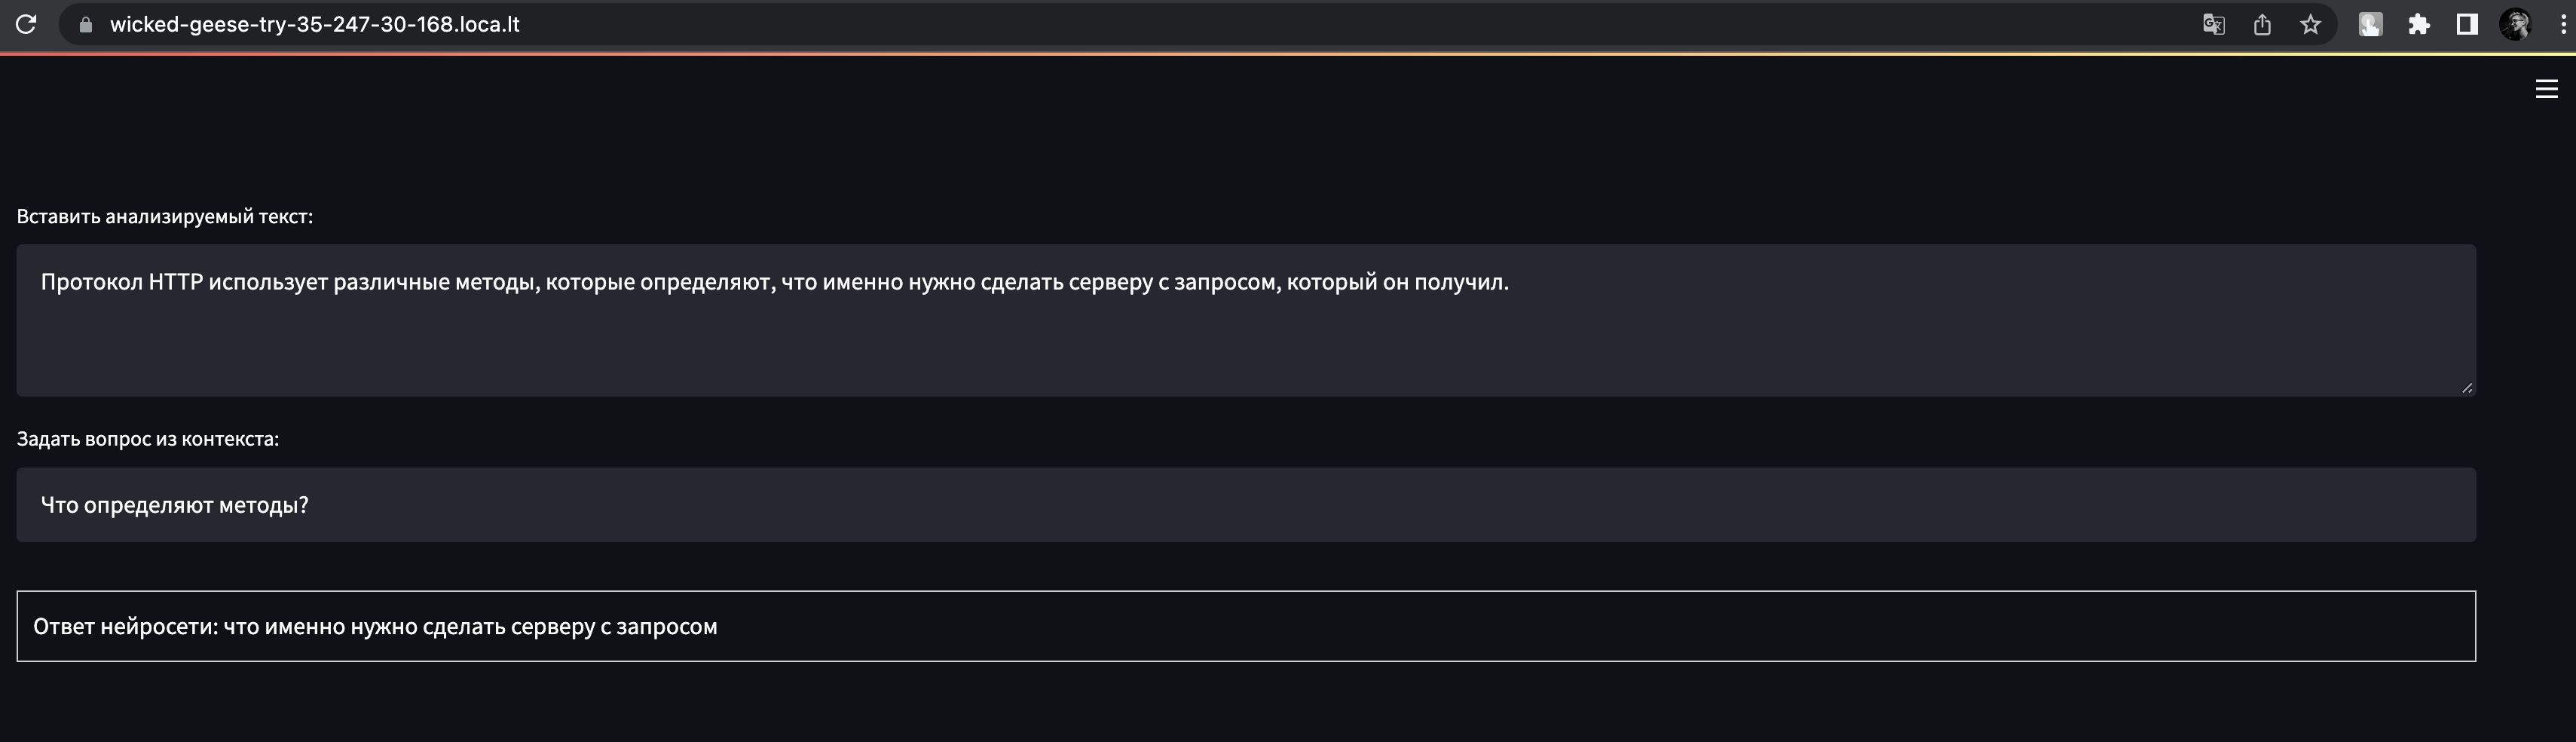

In [ ]:
Image('СкриншотПриложения3.png',
    width = 2000)

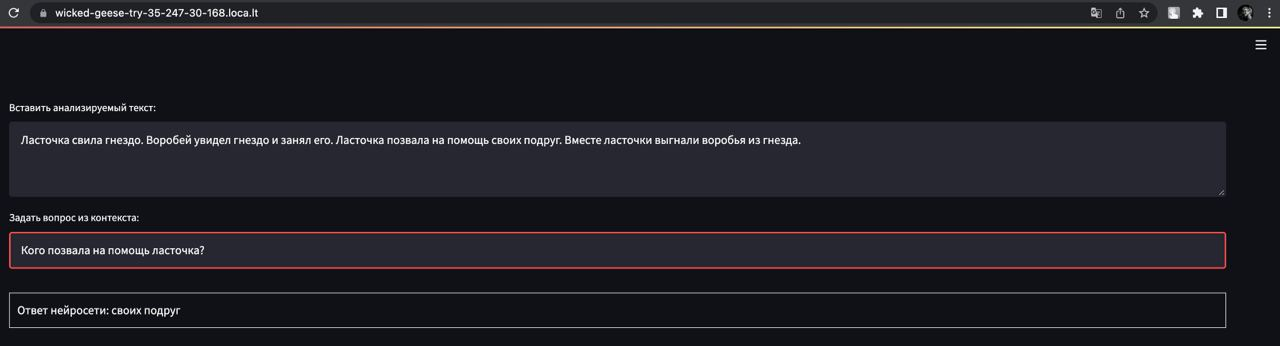

In [ ]:
Image('СкриншотПриложения1 (1).jpg',
    width = 2000)

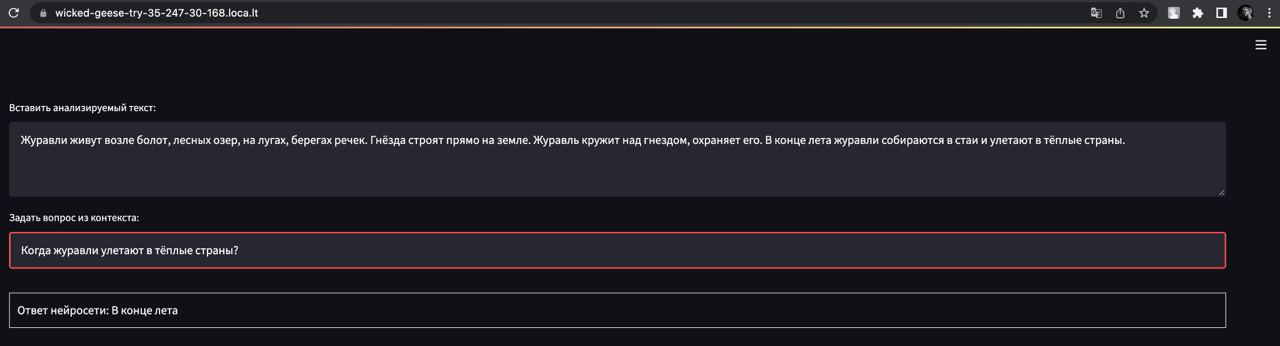

In [ ]:
Image('СкриншотПриложения2.jpg',
    width = 2000)

# FastAPI

In [ ]:
from fastapi import FastAPI
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

app = FastAPI()
model_name = "AndrewChar/model-QA-5-epoch-RU"

@app.get("/predict")
def predict():
    """Анализ текста по контексту в формате вопрос-ответ"""
    nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
    QA_input = {
        'question': 'Что такое API?',
        'context': 'API — описание способов взаимодействия одной компьютерной программы с другими.'
    }
    res = nlp(QA_input)
    return {"answer": res.get('answer')}

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving FAPredict.png to FAPredict.png
Saving FastAPIConsole.png to FastAPIConsole.png
Saving FastApiDocs.png to FastApiDocs.png


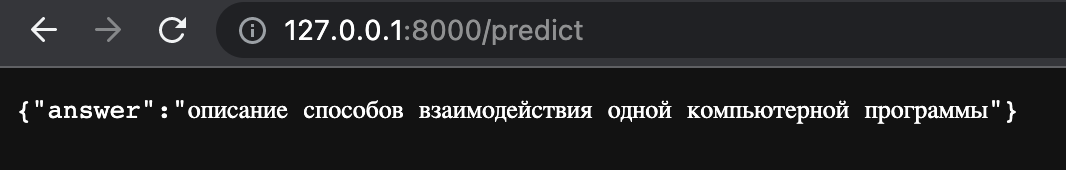

In [ ]:
Image('FAPredict.png',
    width = 2000)

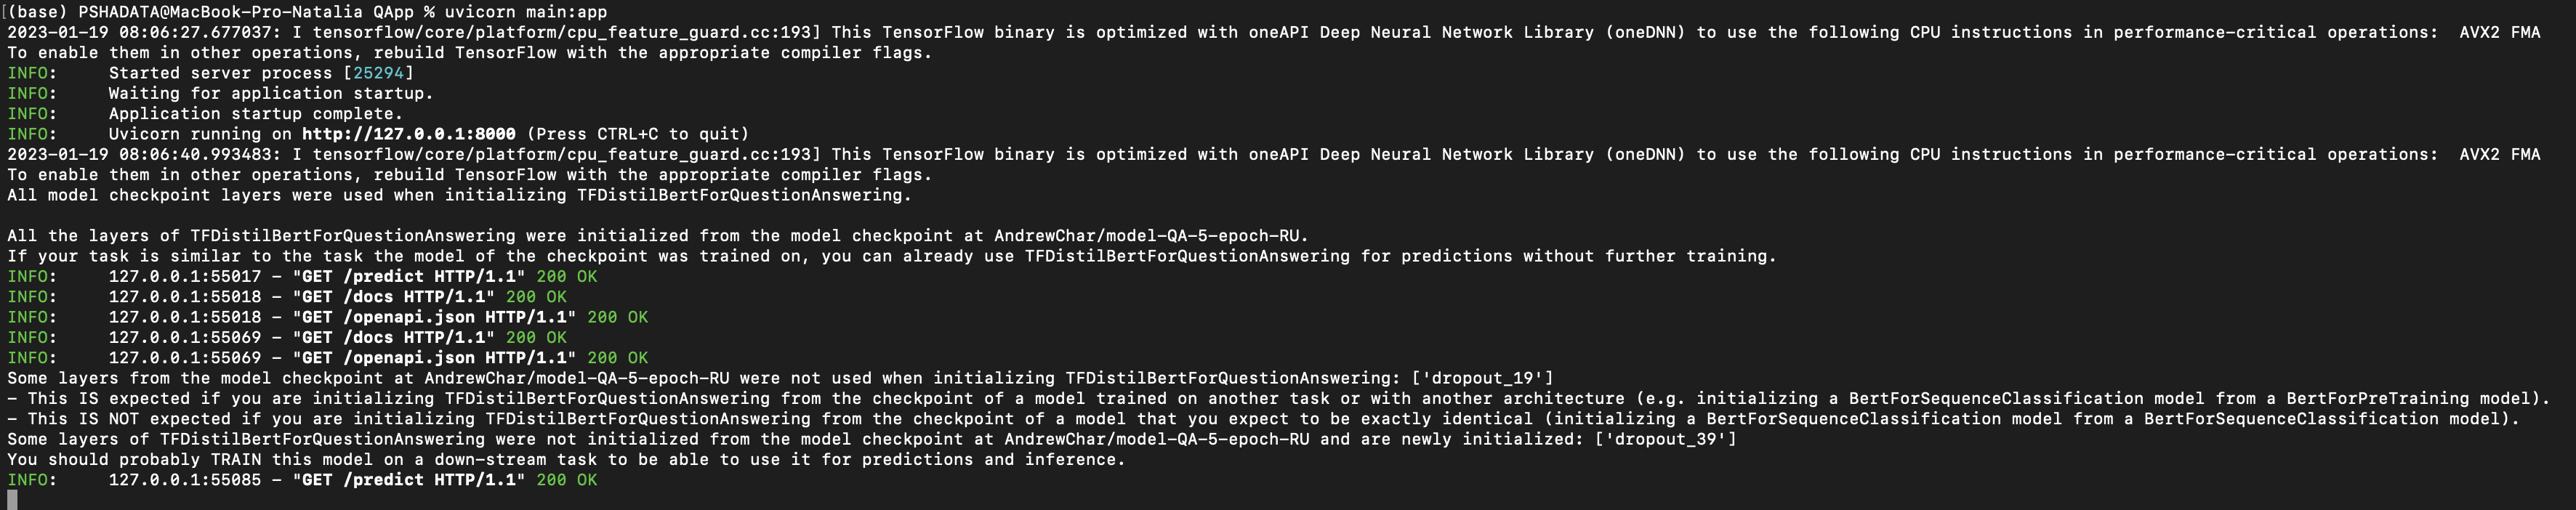

In [ ]:
Image('FastAPIConsole.png',
    width = 2000)

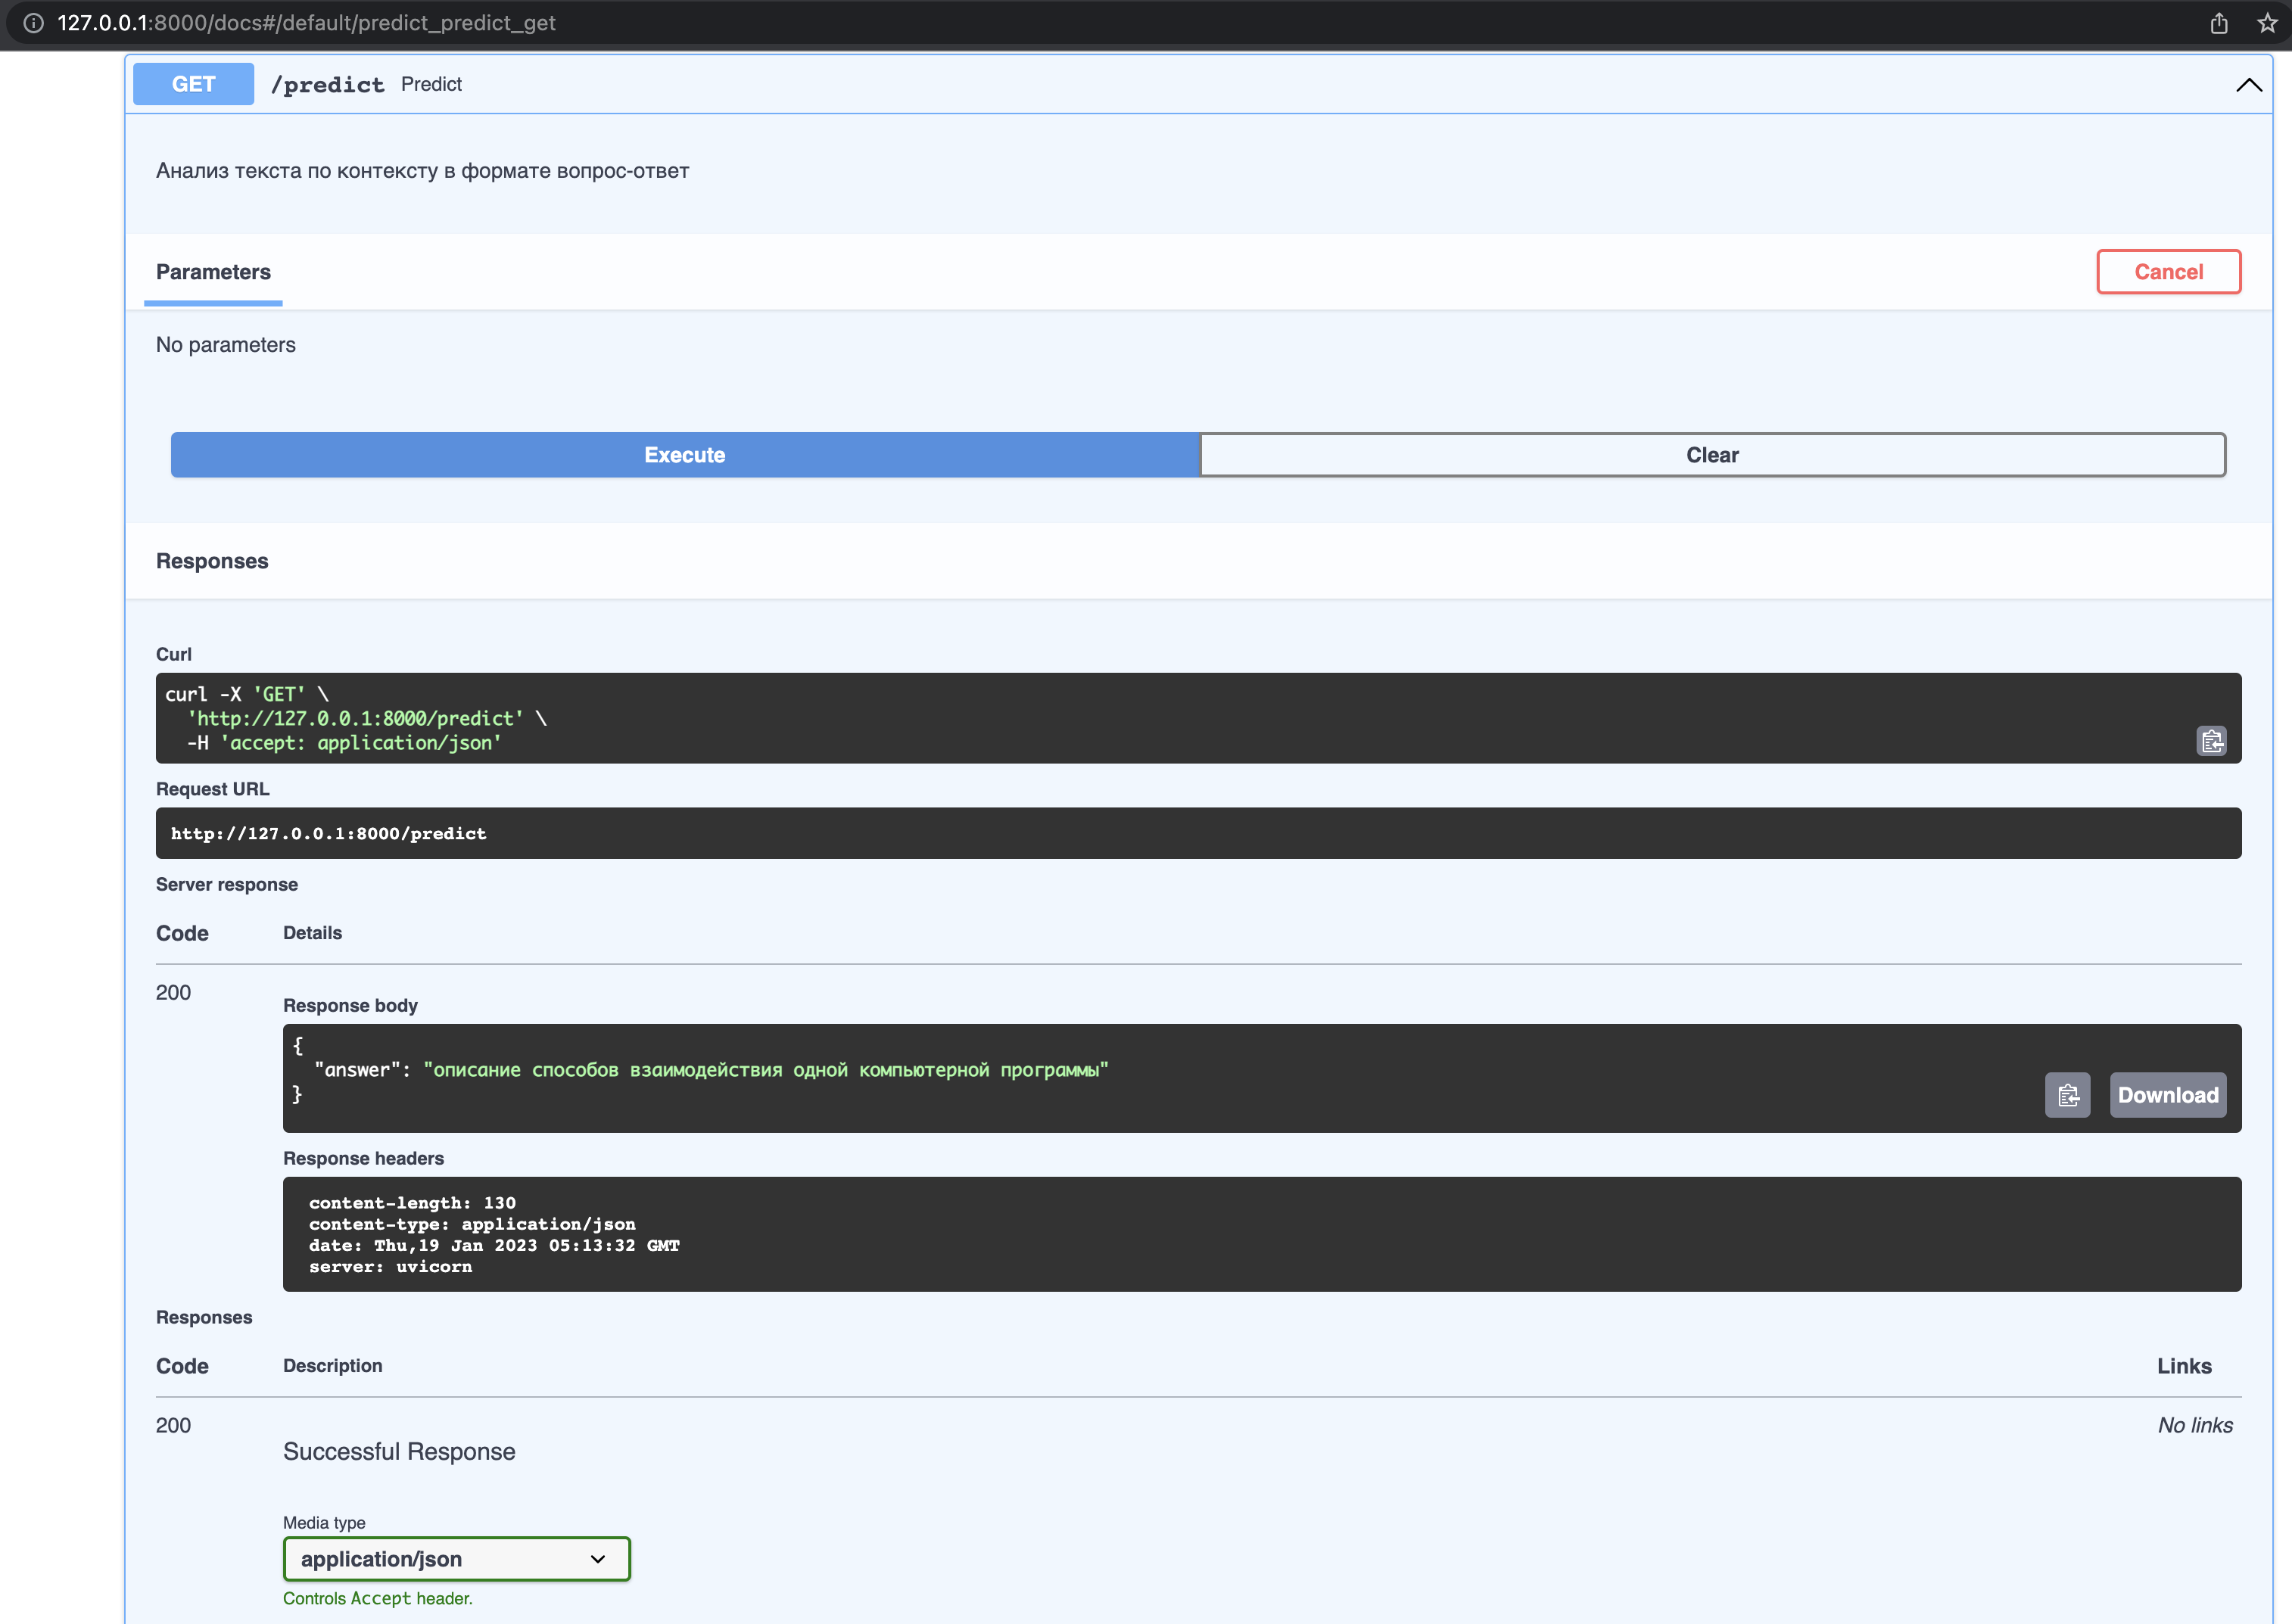

In [ ]:
Image('FastApiDocs.png',
    width = 2000)

# Тестирование

In [ ]:
pip install pytest

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
from fastapi.testclient import TestClient
from main import app

client = TestClient(app)

def test_read_main():
    response = client.get("/predict/")
    QA_input = {
        'question': 'Что такое API?',
        'context': 'API — описание способов взаимодействия одной компьютерной программы с другими.'
    }
    json_data = response.json() 
                          
    assert response.status_code == 200
    assert json_data['answer'] == 'описание способов взаимодействия одной компьютерной программы'
    